looking for one with “A sense of humor.” don't date an engineer!

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] =42
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import re

### the ratings

In [2]:
df1 = pd.read_csv("jester1.csv")
del df1['Unnamed: 0']
df1.head()

,total_number,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,...,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,48,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,...,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [3]:
df1.shape

(73421, 101)

In [4]:
#df1.dtypes

In [5]:
df2 = pd.read_csv("jester2.csv")
del df2['Unnamed: 0']
df2.head()

,total_number,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
0,62,NaN,NaN,NaN,NaN,0.21875,NaN,-9.28125,-9.28125,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34,NaN,NaN,NaN,NaN,-9.68750,NaN,9.93750,9.53125,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18,NaN,NaN,NaN,NaN,-9.84375,NaN,-9.84375,-7.21875,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,82,NaN,NaN,NaN,NaN,6.90625,NaN,4.75000,-5.90625,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,27,NaN,NaN,NaN,NaN,-0.03125,NaN,-9.09375,-0.40625,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df2.shape

(50692, 151)

In [7]:
#df2.dtypes

## mean ratings

In [8]:
df1.mean().sort_values(ascending=False).head(10)

total_number    56.337560
50               3.362593
89               3.348026
32               2.974698
36               2.917245
27               2.907989
35               2.775606
62               2.676263
72               2.632421
29               2.619510
dtype: float64

In [9]:
df2.mean().sort_values(ascending=False).head(10)

total_number    34.104967
53               3.714249
105              3.711070
89               3.606178
129              3.583135
35               3.560140
72               3.505117
32               3.504556
104              3.422973
68               3.386933
dtype: float64

In [10]:
df1['50'].count()

70449

In [11]:
df2['53'].count()

23101

## variability of ratings

A standard deviation close to 0 indicates that the data points tend to be very close to the mean (also called the expected value) of the set, while a high standard deviation indicates that the data points are spread out over a wider range of values.

In [12]:
df1.std().sort_values(ascending=False).head()

total_number    29.015686
71               5.814151
2                5.627972
7                5.610902
41               5.522648
dtype: float64

In [13]:
df1.std().sort_values(ascending=False).tail()

32    4.620225
72    4.612236
36    4.515917
17    4.439184
50    4.412412
dtype: float64

In [14]:
df2.std().sort_values(ascending=False).head()

total_number    33.519225
124              6.082813
140              6.082453
58               6.079202
57               5.950808
dtype: float64

In [15]:
df2.std().sort_values(ascending=False).tail()

9    NaN
10   NaN
11   NaN
12   NaN
14   NaN
dtype: float64

In [16]:
# df1['1'].plot(kind='box')
# for column in df1.columns[:15]:
#     df1[column].plot(kind='box')

### number of votes per joke

In [17]:
df1.count().sort_values(ascending=False).head(10)

total_number    73421
17              73413
8               73411
20              73410
15              73406
19              73406
5               73405
13              73405
18              73404
7               73401
dtype: int64

In [18]:
df2.count().sort_values(ascending=False).head(10)

total_number    50692
7               50692
8               50692
13              50692
15              50692
16              50692
17              50692
18              50692
19              50692
89              25994
dtype: int64

In [19]:
#df1.plot(kind='scatter', x='total_number', y='3')

### checking the jokes with regex

In [20]:
pd.options.display.max_colwidth = 1000000

In [21]:
df_jokes = pd.read_csv("jester_items.csv")
pd.set_option('display.max_rows', 200)
df_jokes

,Number,Text
0,1,"A man visits the doctor. The doctor says, I have bad news for you. You have cancer and Alzheimers disease. The man replies, Well, thank God I dont have cancer!"
1,2,"This couple had an excellent relationship going until one day he came home from work to find his girlfriend packing. He asked her why she was leaving him and she told him that she had heard awful things about him. What could they possibly have said to make you move out?They told me that you were a pedophile.He replied, Thats an awfully big word for a ten year old."
2,3,Q. Whats 200 feet long and has 4 teeth?A. The front row at a Willie Nelson concert.
3,4,Q. Whats the difference between a man and a toilet? A. A toilet doesnt follow you around after you use it.
4,5,"Q. Whats O. J. Simpsons web address?A. Slash, slash, backslash, slash, slash, escape."
5,6,"Bill and Hillary Clinton are on a trip back to Arkansas. Theyre almost out of gas, so Bill pulls into a service station on the outskirts of town. The attendant runs out of the station to serve them when Hillary realizes its an old boyfriend from high school. She and the attendant chat as he gases up their car and cleans the windows. Then they all say goodbye.As Bill pulls the car onto the road, he turns to Hillary and says, Now arent you glad you married me and not him? You couldve been the wife of a grease monkey!To which Hillary replied, No, Bill. If I would have married him, youd be pumping gas and he would be the President!"
6,7,How many feminists does it take to screw in a light bulb?Thats not funny.
7,8,Q. Did you hear about the dyslexic devil worshiper?A. He sold his soul to Santa.
8,9,"A country guy goes into a city bar that has a dress code, and the maitre d demands he wear a tie. Discouraged, the guy goes to his car to sulk when inspiration strikes: Hes got jumper cables in the trunk! So he wraps them around his neck, sort of like a string tie (a bulky string tie to be sure) and returns to the bar. The maitre d is reluctant, but says to the guy, Okay, youre a pretty resourceful fellow, you can come in. but just dont start anything!"
9,10,Two cannibals are eating a clown. One turns to the other and says:br />Does this taste funny to you?


In [22]:
pd.options.display.max_colwidth = 1000000

## Counting lengths

In [23]:
from textblob import TextBlob

In [24]:
all_texts = []

In [25]:
tokens_list =[]
for each_joke in df_jokes['Text']:
    tokens = each_joke.split(" ")
    tokens_list.append(len(tokens))

In [26]:
df_jokes['length'] = tokens_list

In [27]:
df_jokes

,Number,Text,length
0,1,"A man visits the doctor. The doctor says, I have bad news for you. You have cancer and Alzheimers disease. The man replies, Well, thank God I dont have cancer!",30
1,2,"This couple had an excellent relationship going until one day he came home from work to find his girlfriend packing. He asked her why she was leaving him and she told him that she had heard awful things about him. What could they possibly have said to make you move out?They told me that you were a pedophile.He replied, Thats an awfully big word for a ten year old.",69
2,3,Q. Whats 200 feet long and has 4 teeth?A. The front row at a Willie Nelson concert.,17
3,4,Q. Whats the difference between a man and a toilet? A. A toilet doesnt follow you around after you use it.,21
4,5,"Q. Whats O. J. Simpsons web address?A. Slash, slash, backslash, slash, slash, escape.",13
5,6,"Bill and Hillary Clinton are on a trip back to Arkansas. Theyre almost out of gas, so Bill pulls into a service station on the outskirts of town. The attendant runs out of the station to serve them when Hillary realizes its an old boyfriend from high school. She and the attendant chat as he gases up their car and cleans the windows. Then they all say goodbye.As Bill pulls the car onto the road, he turns to Hillary and says, Now arent you glad you married me and not him? You couldve been the wife of a grease monkey!To which Hillary replied, No, Bill. If I would have married him, youd be pumping gas and he would be the President!",121
6,7,How many feminists does it take to screw in a light bulb?Thats not funny.,14
7,8,Q. Did you hear about the dyslexic devil worshiper?A. He sold his soul to Santa.,15
8,9,"A country guy goes into a city bar that has a dress code, and the maitre d demands he wear a tie. Discouraged, the guy goes to his car to sulk when inspiration strikes: Hes got jumper cables in the trunk! So he wraps them around his neck, sort of like a string tie (a bulky string tie to be sure) and returns to the bar. The maitre d is reluctant, but says to the guy, Okay, youre a pretty resourceful fellow, you can come in. but just dont start anything!",91
9,10,Two cannibals are eating a clown. One turns to the other and says:br />Does this taste funny to you?,19


## Creating topics based on 15 first jokes

In [28]:
#https://de.dariah.eu/tatom/topic_model_mallet.html#topic-model-mallet

In [29]:
#https://wordassociations.net/en/words-associated-with/religion?button=Search

In [30]:
# my_regex = r"(\bdifference\b)|(?:Whats|between)"
# whats = [joke for joke in df_jokes['Text'] if re.search(my_regex, joke,re.IGNORECASE)]
# len(whats)

In [31]:
# df_jokes['topic'] = df_jokes['Text'].str.extract(r"(\bBill\b)|(\bHillary\b)|(\b(Clinton)\b)")
# https://stackoverflow.com/questions/30646679/if-value-contains-string-then-set-another-column-value

In [32]:
# df_jokes['Topic'] = df_jokes[['Text']].replace({'Text':clinton}, regex=True)
# df_jokes
# https://stackoverflow.com/questions/43217946/populating-pandas-dataframe-column-based-on-dictionary-of-regex

In [33]:
# https://chrisalbon.com/python/pandas_create_column_using_conditional.html

In [34]:
# pattern = re.compile(r"(\bBill\b)|(\bHillary\b)|(\bClinton\b)")
# df_jokes['matched'] = [(pattern.match(x) is not None) for x in df_jokes['Text'].values]
# df_jokes

In [35]:
# pattern = re.compile(r"(\bBill\b)|(\bHillary\b)|(\bClinton\b)")
# df_jokes['matched'] = [(pattern.match(x) is not None) for x in df_jokes['Text'].values]
#df['diff_names'] = df.matched.astype(int).cumsum()

# def func(group):
#     group['Topic'] = group['Text'].values[0]
#     return group.drop(['matched', 'diff_jokes'], axis=1)

# df_jokes.groupby('diff_jokes').apply(func)
# https://stackoverflow.com/questions/31387113/populate-new-column-based-on-existing-column-checked-against-regex-pandas

In [36]:
# my_regex = r"(\bBill\b)|(\bHillary\b)|(\bClinton\b)"
# if df_jokes['Text'] == re.search(my_regex, joke,re.IGNORECASE)
#     df_jokes['Topic'] = 'Clinton'

In [37]:
# for joke in df_jokes['Text']:
#     if joke == re.search(my_regex, joke,re.IGNORECASE):
#         df_jokes['Topic'] == 'Clinton'

In [38]:
# my_regex = r"(\bBill\b)|(\bHillary\b)|(\bClinton\b)"
# clinton = [joke for joke in df_jokes['Text'] if re.search(my_regex, joke,re.IGNORECASE)]
# for row in df_jokes:
#     if row['Text'] == clinton:
#         row['Topic'] == 'Clinton'

## religion

In [39]:
my_regex = r"(\bpope\b)|(\breligion\b)|(\bchurch\b)|(\bpriest\b)|(\bchristian\b)|(\bbuddist\b)|(\bjewish\b)|(\bmuslim\b)"
religion = [joke for joke in df_jokes['Text'] if re.search(my_regex, joke,re.IGNORECASE)]
len(religion)

8

In [40]:
df_religion = pd.DataFrame(religion)
df_re = df_religion.merge(df_jokes, left_on=0, right_on='Text', how='left')
del df_re[0]
df_re['Number']

0     32
1     37
2     45
3     50
4     54
5     80
6    121
7    143
Name: Number, dtype: int64

## Clinton

In [41]:
# https://stackoverflow.com/questions/17166618/regular-expression-containing-one-word-or-another
my_regex = r"(\bBill\b)|(\bHillary\b)|(\bClinton\b)"
clinton = [joke for joke in df_jokes['Text'] if re.search(my_regex, joke)]
len(clinton)

8

In [42]:
df_clinton = pd.DataFrame(clinton)
df_cl = df_clinton.merge(df_jokes, left_on=0, right_on='Text', how='left')
del df_cl[0]
df_cl['Number']

0     6
1    27
2    31
3    51
4    52
5    61
6    73
7    80
Name: Number, dtype: int64

## health

In [43]:
my_regex = r"(\bdoctor\b)|(\bcancer\b)|(\bnurse\b)|(\bpatient\b)|(\bAlzheimers\b)|(\bhospital\b)|(\bpharmacy\b)"
health = [joke for joke in df_jokes['Text'] if re.search(my_regex, joke,re.IGNORECASE)]
len(health)

8

In [44]:
df_health = pd.DataFrame(clinton)
df_he = df_health.merge(df_jokes, left_on=0, right_on='Text', how='left')
del df_he[0]
df_he['Number']

0     6
1    27
2    31
3    51
4    52
5    61
6    73
7    80
Name: Number, dtype: int64

## marriage

In [45]:
my_regex = r"(\bhusband\b)|(\bwife\b)"
marriage = [joke for joke in df_jokes['Text'] if re.search(my_regex, joke,re.IGNORECASE)]
len(marriage)

12

In [46]:
df_marriage = pd.DataFrame(marriage)
df_ma = df_marriage.merge(df_jokes, left_on=0, right_on='Text', how='left')
del df_ma[0]
df_ma['Number']

0       6
1      12
2      45
3      46
4      53
5      55
6      61
7      69
8     108
9     118
10    130
11    144
Name: Number, dtype: int64

## family

In [47]:
my_regex = r"(\bfather\b)|(\bmother\b)|(\bparent.*\b)|(\bdaughter.*\b)|(\bson.*\b)"
family = [joke for joke in df_jokes['Text'] if re.search(my_regex, joke,re.IGNORECASE)]
len(family)

12

In [48]:
df_family = pd.DataFrame(family)
df_fa = df_family.merge(df_jokes, left_on=0, right_on='Text', how='left')
del df_fa[0]
df_fa['Number']

0      14
1      37
2      45
3      50
4      53
5      92
6     112
7     127
8     142
9     143
10    144
11    149
Name: Number, dtype: int64

## classic joke format

In [49]:
#https://stackoverflow.com/questions/4389644/regex-to-match-string-containing-two-names-in-any-order
my_regex = r"^(?=.*\bWhats\b)(?=.*\bdifference\b).*$"
difference = [joke for joke in df_jokes['Text'] if re.search(my_regex, joke,re.IGNORECASE)]
len(difference)

6

In [50]:
df_difference = pd.DataFrame(difference)
df_di = df_difference.merge(df_jokes, left_on=0, right_on='Text', how='left')
del df_di[0]
df_di['Number']

0      4
1     20
2     21
3     30
4     78
5    100
Name: Number, dtype: int64

In [51]:
# my_regex = r"^(?=.*\bWhat\b)(?=.*\blike\b).*$"
# like = [joke for joke in df_jokes['Text'] if re.search(my_regex, joke,re.IGNORECASE)]
# len(like)

In [52]:
# df_like = pd.DataFrame(like)
# df_li = df_like.merge(df_jokes, left_on=0, right_on='Text', how='left')
# del df_li[0]
# df_li['Number']

In [53]:
my_regex = r"^(?=.*\bHow\b)(?=.*\bmany\b)(?=.*\btake\b).*$"
many = [joke for joke in df_jokes['Text'] if re.search(my_regex, joke,re.IGNORECASE)]
len(many)

7

In [54]:
df_many = pd.DataFrame(many)
df_ny = df_many.merge(df_jokes, left_on=0, right_on='Text', how='left')
del df_ny[0]
df_ny['Number']

0     7
1    17
2    40
3    58
4    74
5    85
6    90
Name: Number, dtype: int64

## strangers

In [55]:
my_regex = r"(\brussian\b)|(\bbritish\b)|(\bfrench.*\b)|(\bpolish\b)|(\bjapanese\b)|(\bscott\b)|(\bcanadian\b)"
abroad = [joke for joke in df_jokes['Text'] if re.search(my_regex, joke,re.IGNORECASE)]
len(abroad)

8

In [56]:
df_abroad = pd.DataFrame(abroad)
df_ab = df_abroad.merge(df_jokes, left_on=0, right_on='Text', how='left')
del df_ab[0]
df_ab['Number']

0     13
1     36
2     59
3     89
4    107
5    126
6    128
7    150
Name: Number, dtype: int64

## engineers

In [57]:
my_regex = r"(\bengineer.*\b)|(\bengineering\b)|(\bprogrammer.*\b)|(\bprogramming\b)"
engineer = [joke for joke in df_jokes['Text'] if re.search(my_regex, joke,re.IGNORECASE)]
len(engineer)

12

In [58]:
df_engineer = pd.DataFrame(engineer)
df_en = df_engineer.merge(df_jokes, left_on=0, right_on='Text', how='left')
del df_en[0]
df_en['Number']

0      28
1      47
2      48
3      49
4      62
5      63
6      82
7      84
8      90
9      93
10    106
11    116
Name: Number, dtype: int64

## Sexes

In [59]:
my_regex = r"(\bman\b)|(\bmen\b)|(\bguy.*\b)"
men = [joke for joke in df_jokes['Text'] if re.search(my_regex, joke,re.IGNORECASE)]
len(men)

43

In [60]:
df_men = pd.DataFrame(men)
df_me = df_men.merge(df_jokes, left_on=0, right_on='Text', how='left')
del df_me[0]
df_me['Number']

0       1
1       4
2       9
3      12
4      17
5      26
6      32
7      33
8      36
9      37
10     39
11     42
12     46
13     50
14     56
15     68
16     69
17     76
18     81
19     83
20     87
21     88
22    102
23    103
24    105
25    106
26    108
27    116
28    117
29    118
30    119
31    120
32    129
33    130
34    131
35    134
36    135
37    136
38    142
39    143
40    144
41    147
42    148
Name: Number, dtype: int64

In [61]:
my_regex = r"(\bwoman\b)|(\blady\b)|(\bladies\b)|(\bwomen\b)"
women = [joke for joke in df_jokes['Text'] if re.search(my_regex, joke,re.IGNORECASE)]
len(women)

12

In [62]:
df_women = pd.DataFrame(women)
df_wo = df_women.merge(df_jokes, left_on=0, right_on='Text', how='left')
del df_wo[0]
df_wo['Number']

0      26
1      39
2      42
3      53
4      55
5      65
6      76
7      83
8     108
9     115
10    116
11    129
Name: Number, dtype: int64

## not used in such detail

In [63]:
my_regex = r"(\bboyfriend\b)|(\bgirlfriend\b)|(\bdating\b)"
boyfriend = [joke for joke in df_jokes['Text'] if re.search(my_regex, joke,re.IGNORECASE)]
len(boyfriend)

3

In [64]:
my_regex = r"(\bprogrammer.*\b)|(\bprogramming\b)"
programmer = [joke for joke in df_jokes['Text'] if re.search(my_regex, joke,re.IGNORECASE)]
len(programmer)

2

In [65]:
my_regex = r"(\bphysicist.*\b)|(\bmathematician.*\b)|(\bastronomer.*\b)"
phymath = [joke for joke in df_jokes['Text'] if re.search(my_regex, joke,re.IGNORECASE)]
len(phymath)

2

In [66]:
my_regex = r"(\bpolish\b)"
polish = [joke for joke in df_jokes['Text'] if re.search(my_regex, joke,re.IGNORECASE)]
len(polish)

1

In [67]:
my_regex = r"(\brussian\b)"
russian = [joke for joke in df_jokes['Text'] if re.search(my_regex, joke,re.IGNORECASE)]
len(russian)

2

In [68]:
my_regex = r"(\bfrench\b)"
french = [joke for joke in df_jokes['Text'] if re.search(my_regex, joke,re.IGNORECASE)]
len(french)

2

In [69]:
my_regex = r"(\bbritish\b)|(\bbriton\b)"
british = [joke for joke in df_jokes['Text'] if re.search(my_regex, joke,re.IGNORECASE)]
len(british)

2

## matching with ratings

In [70]:
df_num = pd.DataFrame()

In [71]:
df_num['ratings2'] = pd.Series(df2.mean())

In [72]:
df_num['ratings1'] = pd.Series(df1.mean())

In [73]:
df_num['counts2'] = pd.Series(df2.count())

In [74]:
df_num['counts1'] = pd.Series(df1.count())

In [75]:
df_num['dev2'] = pd.Series(df2.std())

In [76]:
df_num['dev1'] = pd.Series(df1.std())

In [77]:
df_num.to_csv('df.csv')

In [78]:
df_num = pd.read_csv('df.csv')

In [79]:
df_num.head()

,Unnamed: 0,ratings2,ratings1,counts2,counts1,dev2,dev1
0,total_number,34.104967,56.337560,50692,73421.0,33.519225,29.015686
1,1,NaN,0.901997,0,32024.0,NaN,5.242998
2,2,NaN,0.162989,0,35277.0,NaN,5.627972
3,3,NaN,0.193411,0,32402.0,NaN,5.448998
4,4,NaN,-1.412599,0,30512.0,NaN,5.276202


### WOMEN

In [81]:
df_WO = df_wo.merge(df_num, left_on='Number', right_index=True, how='left')

In [82]:
df_WO.ratings1.mean()

1.660762384761777

In [83]:
df_WO.ratings2.mean()

2.3470384115600962

### MEN

In [84]:
df_ME = df_me.merge(df_num, left_on='Number', right_index=True, how='left')

In [85]:
df_ME.ratings1.mean()

1.2329191288481758

In [86]:
df_ME.ratings2.mean()

2.1877775564166675

## ??? "HE" AND "SHE"  ??? 

### CLINTON

In [ ]:
df_CL = df_cl.merge(df, left_on='Number', right_index=True, how='left')

In [ ]:
df_CL.ratings1.mean()

In [ ]:
df_CL.ratings2.mean()

### RELIGION

In [ ]:
df_RE = df_re.merge(df, left_on='Number', right_index=True, how='left')

In [ ]:
df_RE.ratings1.mean()

In [ ]:
df_RE.ratings2.mean()

### HEALTH

In [ ]:
df_HE = df_he.merge(df, left_on='Number', right_index=True, how='left')

In [ ]:
df_HE.ratings1.mean()

In [ ]:
df_HE.ratings2.mean()

In [ ]:
df_HE.ratings2.hist(bins=30)

### FAMILY

In [ ]:
df_FA = df_fa.merge(df, left_on='Number', right_index=True, how='left')

In [ ]:
df_FA.ratings1.mean()

In [ ]:
df_FA.ratings2.mean()

In [ ]:
df_FA.ratings2.hist(bins=30)

### FAMILY

In [ ]:
df_MA = df_ma.merge(df, left_on='Number', right_index=True, how='left')

In [ ]:
df_MA.ratings1.mean()

In [ ]:
df_MA.ratings2.mean()

### DIFFERENCES

In [ ]:
df_DI = df_di.merge(df, left_on='Number', right_index=True, how='left')

In [ ]:
df_DI.ratings1.mean()

In [ ]:
df_DI.ratings2.mean()

### LIKE

In [ ]:
df_LI = df_li.merge(df, left_on='Number', right_index=True, how='left')

In [ ]:
df_LI.ratings1.mean()

In [ ]:
df_LI.ratings2.mean()

### MANY

In [ ]:
df_MA = df_ma.merge(df, left_on='Number', right_index=True, how='left')

In [ ]:
df_MA.ratings1.mean()

In [ ]:
df_MA.ratings2.mean()

### ABROAD

In [ ]:
df_AB = df_ab.merge(df, left_on='Number', right_index=True, how='left')

In [ ]:
df_AB.ratings1.mean()

In [ ]:
df_AB.ratings2.mean()

### ENGINEERS

In [ ]:
df_EN = df_en.merge(df, left_on='Number', right_index=True, how='left')

In [ ]:
df_EN.ratings1.mean()

In [ ]:
df_EN.ratings1.mean()

## Adding length

In [87]:
df_num.head()

,Unnamed: 0,ratings2,ratings1,counts2,counts1,dev2,dev1
0,total_number,34.104967,56.337560,50692,73421.0,33.519225,29.015686
1,1,NaN,0.901997,0,32024.0,NaN,5.242998
2,2,NaN,0.162989,0,35277.0,NaN,5.627972
3,3,NaN,0.193411,0,32402.0,NaN,5.448998
4,4,NaN,-1.412599,0,30512.0,NaN,5.276202


In [88]:
df_num.drop(df_num.index[0], inplace=True)
df_num.head()

,Unnamed: 0,ratings2,ratings1,counts2,counts1,dev2,dev1
1,1,NaN,0.901997,0,32024.0,NaN,5.242998
2,2,NaN,0.162989,0,35277.0,NaN,5.627972
3,3,NaN,0.193411,0,32402.0,NaN,5.448998
4,4,NaN,-1.412599,0,30512.0,NaN,5.276202
5,5,-2.034618,0.235352,566,73405.0,5.423289,5.302902


In [89]:
df_num.rename(columns={'Unnamed: 0': 'Number'}, inplace=True)
df_num.Number = df_num.Number.astype(int)
df_num.head()

,Number,ratings2,ratings1,counts2,counts1,dev2,dev1
1,1,NaN,0.901997,0,32024.0,NaN,5.242998
2,2,NaN,0.162989,0,35277.0,NaN,5.627972
3,3,NaN,0.193411,0,32402.0,NaN,5.448998
4,4,NaN,-1.412599,0,30512.0,NaN,5.276202
5,5,-2.034618,0.235352,566,73405.0,5.423289,5.302902


In [90]:
df_num.dtypes

Number        int64
ratings2    float64
ratings1    float64
counts2       int64
counts1     float64
dev2        float64
dev1        float64
dtype: object

In [91]:
df_jokes.head()

,Number,Text,length
0,1,"A man visits the doctor. The doctor says, I have bad news for you. You have cancer and Alzheimers disease. The man replies, Well, thank God I dont have cancer!",30
1,2,"This couple had an excellent relationship going until one day he came home from work to find his girlfriend packing. He asked her why she was leaving him and she told him that she had heard awful things about him. What could they possibly have said to make you move out?They told me that you were a pedophile.He replied, Thats an awfully big word for a ten year old.",69
2,3,Q. Whats 200 feet long and has 4 teeth?A. The front row at a Willie Nelson concert.,17
3,4,Q. Whats the difference between a man and a toilet? A. A toilet doesnt follow you around after you use it.,21
4,5,"Q. Whats O. J. Simpsons web address?A. Slash, slash, backslash, slash, slash, escape.",13


In [92]:
df_jokes.dtypes

Number     int64
Text      object
length     int64
dtype: object

In [93]:
df = df_num.merge(df_jokes, left_on='Number', right_on='Number', how='outer', copy=False)
df

,Number,ratings2,ratings1,counts2,counts1,dev2,dev1,Text,length
0,1,NaN,0.901997,0,32024.0,NaN,5.242998,"A man visits the doctor. The doctor says, I have bad news for you. You have cancer and Alzheimers disease. The man replies, Well, thank God I dont have cancer!",30
1,2,NaN,0.162989,0,35277.0,NaN,5.627972,"This couple had an excellent relationship going until one day he came home from work to find his girlfriend packing. He asked her why she was leaving him and she told him that she had heard awful things about him. What could they possibly have said to make you move out?They told me that you were a pedophile.He replied, Thats an awfully big word for a ten year old.",69
2,3,NaN,0.193411,0,32402.0,NaN,5.448998,Q. Whats 200 feet long and has 4 teeth?A. The front row at a Willie Nelson concert.,17
3,4,NaN,-1.412599,0,30512.0,NaN,5.276202,Q. Whats the difference between a man and a toilet? A. A toilet doesnt follow you around after you use it.,21
4,5,-2.034618,0.235352,566,73405.0,5.423289,5.302902,"Q. Whats O. J. Simpsons web address?A. Slash, slash, backslash, slash, slash, escape.",13
5,6,NaN,1.330277,0,39599.0,NaN,4.976994,"Bill and Hillary Clinton are on a trip back to Arkansas. Theyre almost out of gas, so Bill pulls into a service station on the outskirts of town. The attendant runs out of the station to serve them when Hillary realizes its an old boyfriend from high school. She and the attendant chat as he gases up their car and cleans the windows. Then they all say goodbye.As Bill pulls the car onto the road, he turns to Hillary and says, Now arent you glad you married me and not him? You couldve been the wife of a grease monkey!To which Hillary replied, No, Bill. If I would have married him, youd be pumping gas and he would be the President!",121
6,7,-1.952510,-0.633947,50692,73401.0,5.370893,5.610902,How many feminists does it take to screw in a light bulb?Thats not funny.,14
7,8,-0.716500,-0.996267,50692,73411.0,5.153371,4.968263,Q. Did you hear about the dyslexic devil worshiper?A. He sold his soul to Santa.,15
8,9,NaN,-0.620039,0,30741.0,NaN,5.201667,"A country guy goes into a city bar that has a dress code, and the maitre d demands he wear a tie. Discouraged, the guy goes to his car to sulk when inspiration strikes: Hes got jumper cables in the trunk! So he wraps them around his neck, sort of like a string tie (a bulky string tie to be sure) and returns to the bar. The maitre d is reluctant, but says to the guy, Okay, youre a pretty resourceful fellow, you can come in. but just dont start anything!",91
9,10,NaN,1.181706,0,39352.0,NaN,5.183989,Two cannibals are eating a clown. One turns to the other and says:br />Does this taste funny to you?,19


In [94]:
df['length'].describe()

count    150.000000
mean      66.053333
std       51.620815
min        8.000000
25%       23.250000
50%       55.000000
75%       96.000000
max      247.000000
Name: length, dtype: float64

In [95]:
df.loc[df.length < 15, "word_leng"] = "very short"
df.loc[(df.length > 14) & (df.length < 40), "word_leng"] = "short"
df.loc[(df.length > 39) & (df.length < 80), "word_leng"] = "medium"
df.loc[(df.length > 79) & (df.length < 150), "word_leng"] = "long"
df.loc[df.length > 149, "word_leng"] = "very long"
df

,Number,ratings2,ratings1,counts2,counts1,dev2,dev1,Text,length,word_leng
0,1,NaN,0.901997,0,32024.0,NaN,5.242998,"A man visits the doctor. The doctor says, I have bad news for you. You have cancer and Alzheimers disease. The man replies, Well, thank God I dont have cancer!",30,short
1,2,NaN,0.162989,0,35277.0,NaN,5.627972,"This couple had an excellent relationship going until one day he came home from work to find his girlfriend packing. He asked her why she was leaving him and she told him that she had heard awful things about him. What could they possibly have said to make you move out?They told me that you were a pedophile.He replied, Thats an awfully big word for a ten year old.",69,medium
2,3,NaN,0.193411,0,32402.0,NaN,5.448998,Q. Whats 200 feet long and has 4 teeth?A. The front row at a Willie Nelson concert.,17,short
3,4,NaN,-1.412599,0,30512.0,NaN,5.276202,Q. Whats the difference between a man and a toilet? A. A toilet doesnt follow you around after you use it.,21,short
4,5,-2.034618,0.235352,566,73405.0,5.423289,5.302902,"Q. Whats O. J. Simpsons web address?A. Slash, slash, backslash, slash, slash, escape.",13,very short
5,6,NaN,1.330277,0,39599.0,NaN,4.976994,"Bill and Hillary Clinton are on a trip back to Arkansas. Theyre almost out of gas, so Bill pulls into a service station on the outskirts of town. The attendant runs out of the station to serve them when Hillary realizes its an old boyfriend from high school. She and the attendant chat as he gases up their car and cleans the windows. Then they all say goodbye.As Bill pulls the car onto the road, he turns to Hillary and says, Now arent you glad you married me and not him? You couldve been the wife of a grease monkey!To which Hillary replied, No, Bill. If I would have married him, youd be pumping gas and he would be the President!",121,long
6,7,-1.952510,-0.633947,50692,73401.0,5.370893,5.610902,How many feminists does it take to screw in a light bulb?Thats not funny.,14,very short
7,8,-0.716500,-0.996267,50692,73411.0,5.153371,4.968263,Q. Did you hear about the dyslexic devil worshiper?A. He sold his soul to Santa.,15,short
8,9,NaN,-0.620039,0,30741.0,NaN,5.201667,"A country guy goes into a city bar that has a dress code, and the maitre d demands he wear a tie. Discouraged, the guy goes to his car to sulk when inspiration strikes: Hes got jumper cables in the trunk! So he wraps them around his neck, sort of like a string tie (a bulky string tie to be sure) and returns to the bar. The maitre d is reluctant, but says to the guy, Okay, youre a pretty resourceful fellow, you can come in. but just dont start anything!",91,long
9,10,NaN,1.181706,0,39352.0,NaN,5.183989,Two cannibals are eating a clown. One turns to the other and says:br />Does this taste funny to you?,19,short


In [101]:
df.to_csv('df_all.csv')

In [96]:
df.groupby('word_leng').ratings1.mean()

word_leng
long          1.849241
medium        1.238362
short         0.064186
very long     2.143349
very short   -0.814399
Name: ratings1, dtype: float64

In [97]:
df.groupby('word_leng').ratings2.mean()

word_leng
long          2.681584
medium        2.016106
short         0.732963
very long     2.803115
very short   -0.439089
Name: ratings2, dtype: float64

In [98]:
df.word_leng.value_counts()

short         45
medium        41
long          38
very short    14
very long     12
Name: word_leng, dtype: int64

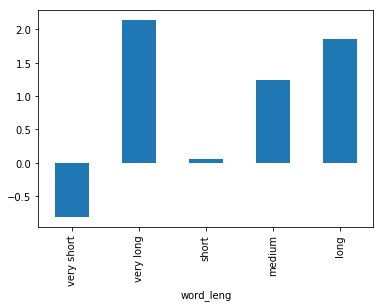

In [99]:
df.groupby('word_leng').ratings1.mean().sort_index(ascending=False).plot(kind='bar')

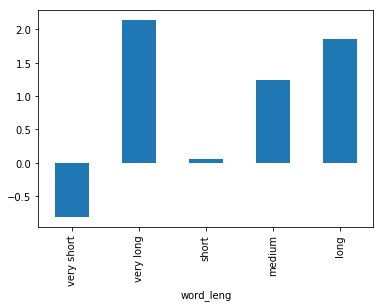

In [100]:
df.groupby('word_leng').ratings1.mean().sort_index(ascending=False).plot(kind='bar')